# Packages

In [8]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [19]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))

from src.analyze_func import simple_analysis, show_distribution, col_unique, show_all_symptoms, unify_values, split_BPL, split_Chrolesterol, change_sympt
from src.clean_data import validate_input_data

In [20]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [8]:
df = pd.read_csv('../datasets/brain_stroke.csv')

# Example Data Cleaning

### temp var

In [31]:
invalid_df = pd.read_csv('../datasets/invalid_input_data.csv')
invalid_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Other,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,120,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79,1,0,Maybe,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81,0,0,Yes,Private,Urban,-5.00,29.0,formerly smoked,1
5,Male,74,1,1,Yes,Private,Rural,70.09,100.0,never smoked,1
6,Alien,69,0,0,No,Private,Urban,94.39,22.8,never smoked,9
7,Female,78,0,0,Yes,InvalidType,Urban,58.57,24.2,Unknown,1
8,Female,81,1,0,Yes,Private,Suburb,80.43,29.7,never smoked,1
9,Female,61,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


### cleaning

In [32]:
valid_df = validate_input_data(invalid_df)
valid_df

Removed 12 invalid rows.


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61,0,1,Yes,Govt_job,Rural,120.46,36.8,Smokes,1
1,Male,64,0,1,Yes,Private,Urban,191.61,37.5,Smokes,1
2,Male,75,1,0,Yes,Private,Urban,221.29,25.8,Smokes,1


# Simple analysis

In [9]:
simple_analysis(df,target_col='stroke')

All columns:  Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
Shape of df:  (4981, 11)
Description of df:
                age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6

In [10]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Checking the data distribution

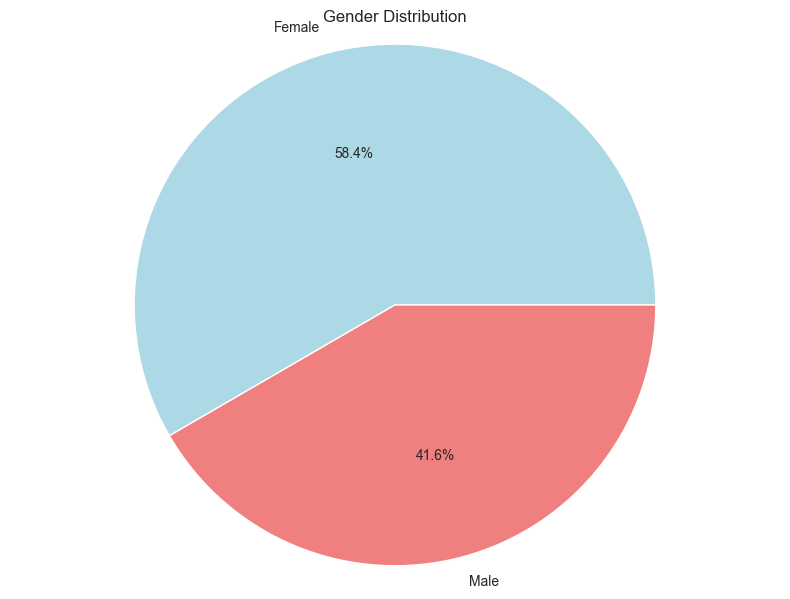

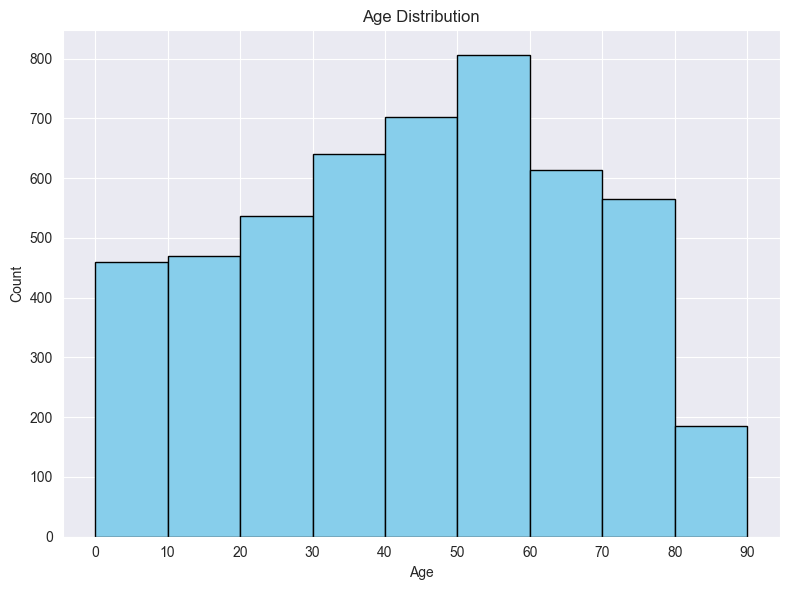

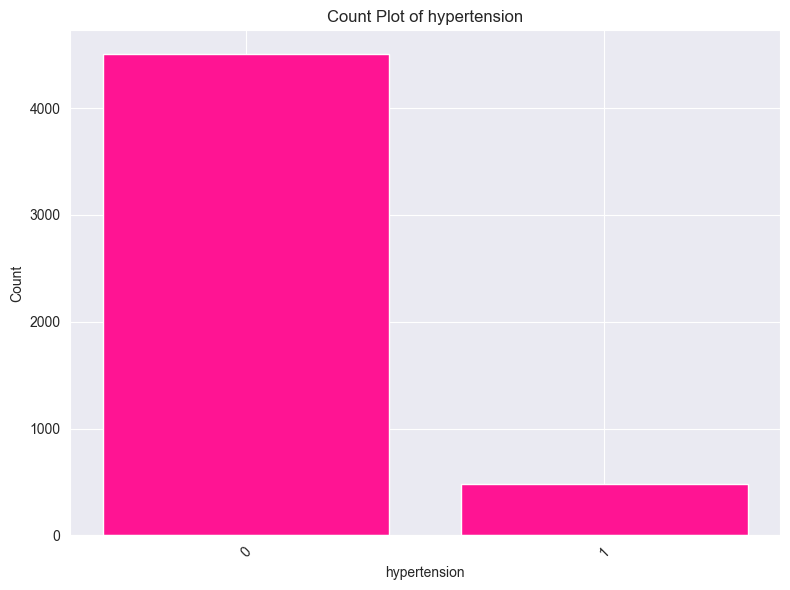

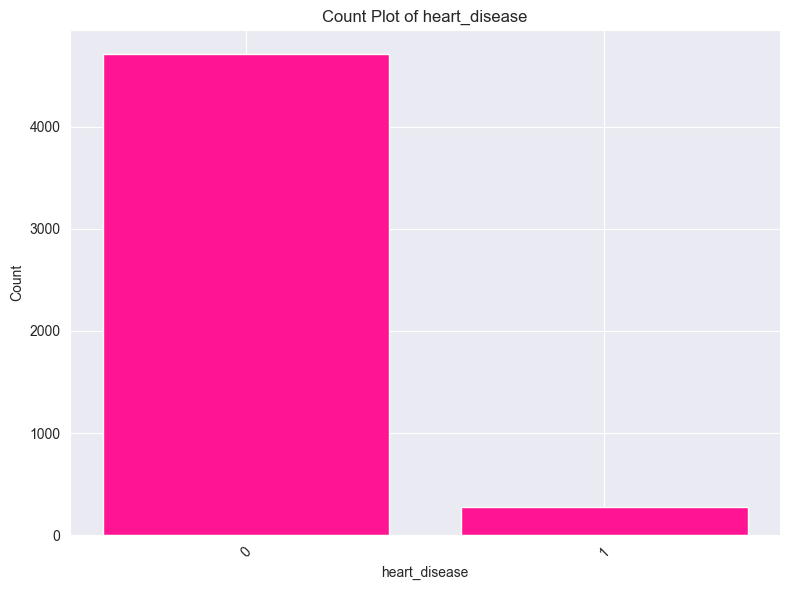

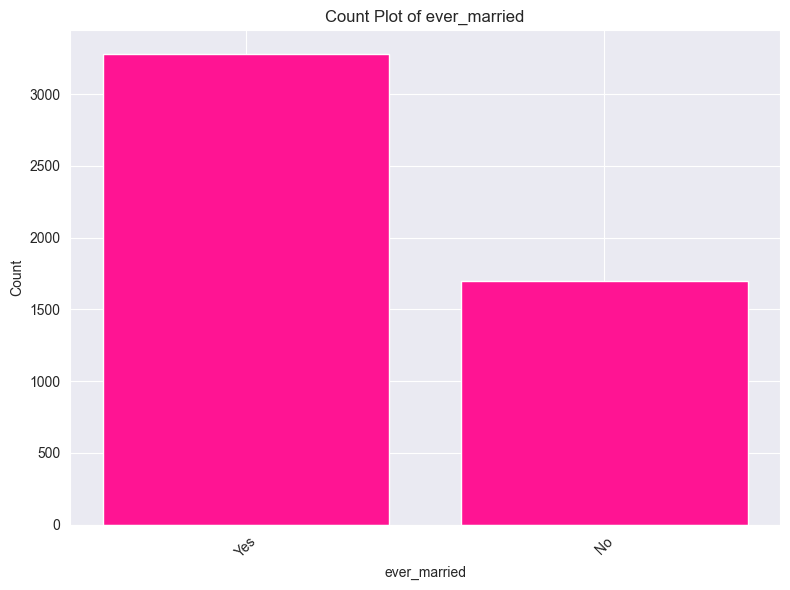

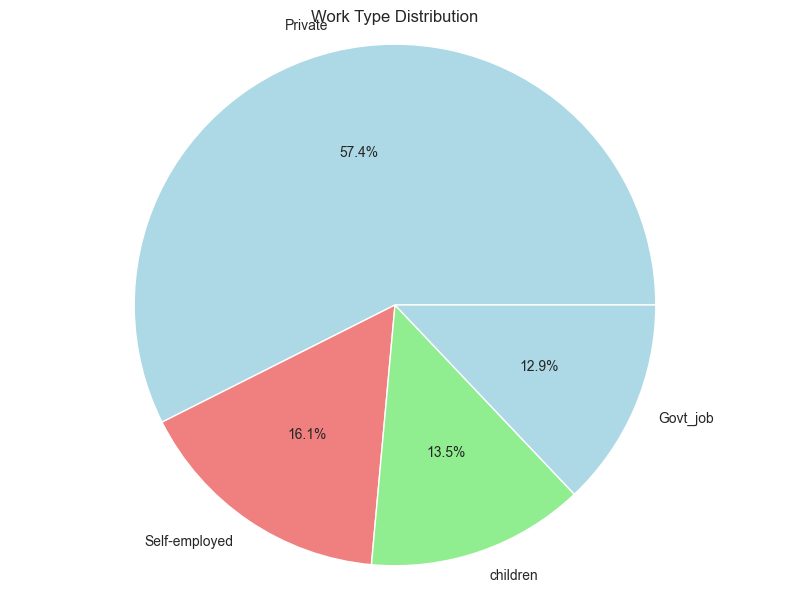

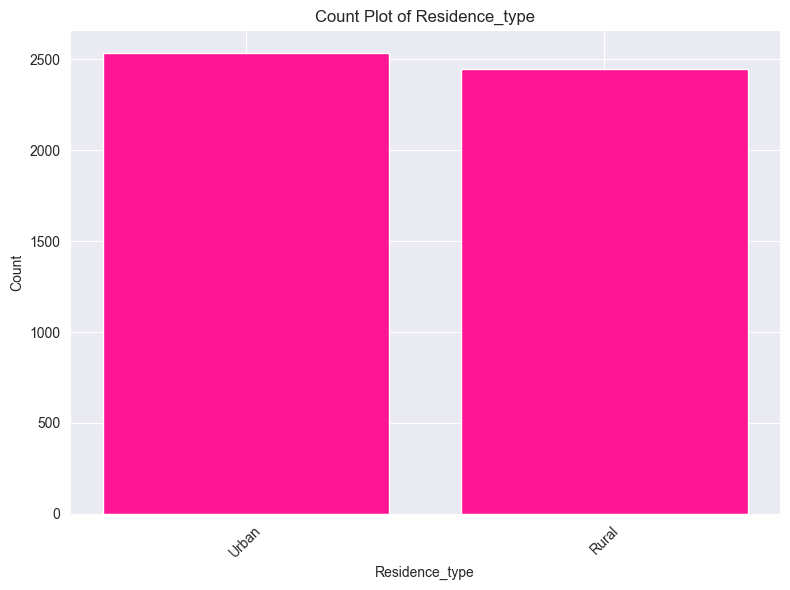

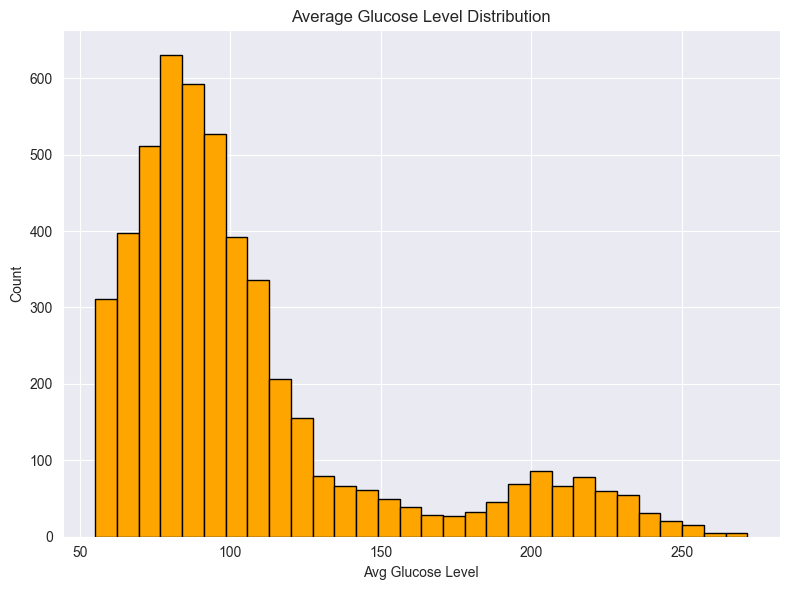

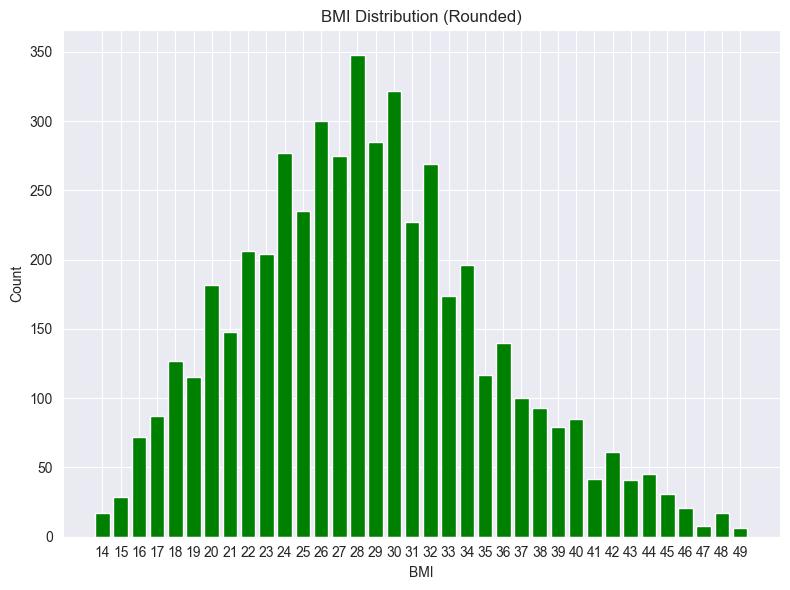

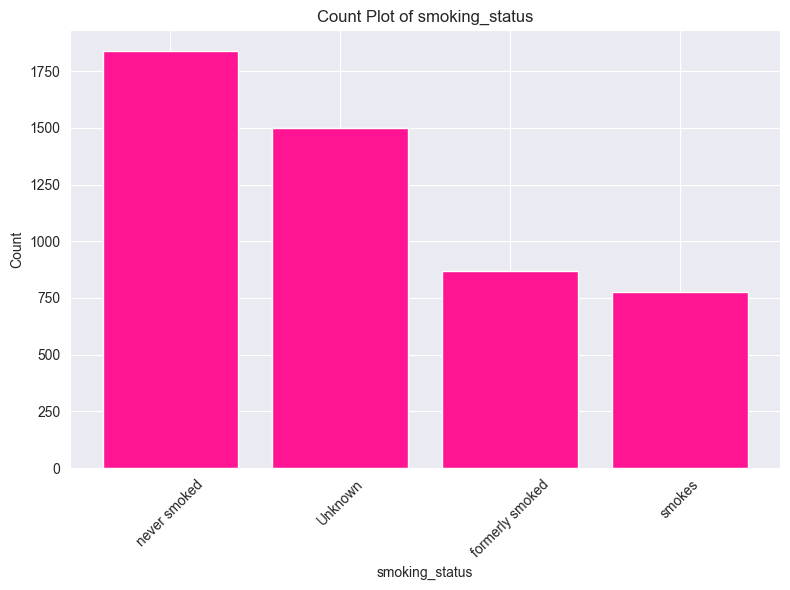

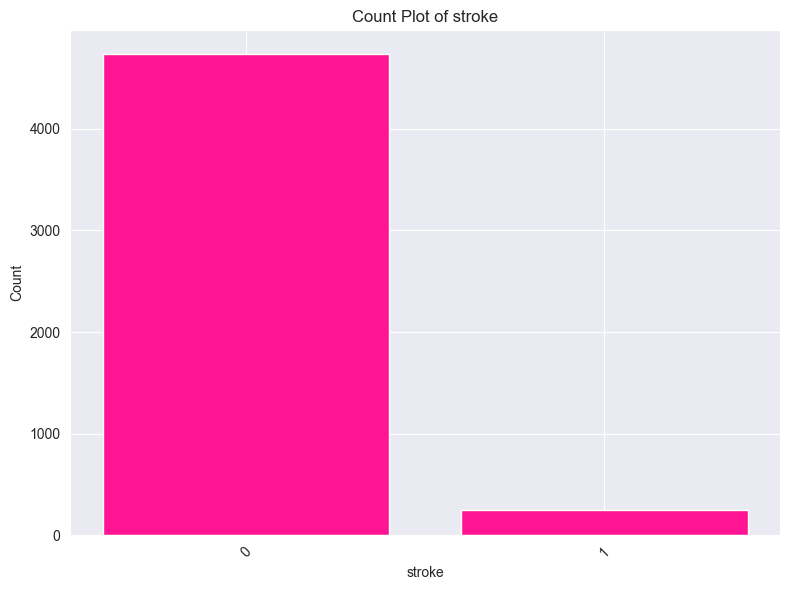

In [13]:
show_distribution(df)

## Min and Max values for columns

In [14]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


## Split to X column and Y target

In [74]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [78]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [16]:
X = df.drop(columns=['stroke'], axis=1)

## Setting the variable for ML

In [17]:
Y = df['stroke'] # Zmienna

In [18]:
Y.value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

## Displaying unique values for each column

In [19]:
col_unique(X, cols=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

Name:  gender 
Unique Values:  ['Male' 'Female'] 

Name:  ever_married 
Unique Values:  ['Yes' 'No'] 

Name:  work_type 
Unique Values:  ['Private' 'Self-employed' 'Govt_job' 'children'] 

Name:  Residence_type 
Unique Values:  ['Urban' 'Rural'] 

Name:  smoking_status 
Unique Values:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown'] 


---
# The beginning of data unification

# Data before unification

In [20]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes


### Making a temporary table

In [21]:
X_temp = X.copy()

## Splitting and unifying values for each column in cols_to_unify variable

### Splitting columns that contains many types of data to separate columns
for columns below if contains: 0 - false, 1 - true

In [22]:
cols_to_unify = ['work_type', 'smoking_status']

for col in cols_to_unify:
    for new_col in X_temp[col].unique():
        X_temp[new_col] = X_temp[col].apply(lambda x: change_sympt(x, new_col))

### Assigned values (str -> int) for columns below

In [23]:
cols_to_unify = ['gender', 'ever_married', 'Residence_type']

for col in cols_to_unify:
    print("For column: ", col, "\t assigning: 0 for ", X_temp[col].unique()[1])
    print("For column: ", col, "\t assigning: 1 for ", X_temp[col].unique()[0])
    X_temp[col] = X_temp[col].apply(lambda x: unify_values(x, X_temp[col].unique()[0]))

For column:  gender 	 assigning: 0 for  Female
For column:  gender 	 assigning: 1 for  Male
For column:  ever_married 	 assigning: 0 for  No
For column:  ever_married 	 assigning: 1 for  Yes
For column:  Residence_type 	 assigning: 0 for  Rural
For column:  Residence_type 	 assigning: 1 for  Urban


## Data after modifications

In [24]:
X_temp

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Private,Self-employed,Govt_job,children,formerly smoked,never smoked,smokes,Unknown
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,0,0,0,1,0,0,0
1,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,0,0,0,0,1,0,0
2,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,0,0,0,0,0,1,0
3,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,0,1,0,0,0,1,0,0
4,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,Private,0,70.15,29.8,formerly smoked,1,0,0,0,1,0,0,0
4977,1,40.0,0,0,1,Private,1,191.15,31.1,smokes,1,0,0,0,0,0,1,0
4978,0,45.0,1,0,1,Govt_job,0,95.02,31.8,smokes,0,0,1,0,0,0,1,0
4979,1,40.0,0,0,1,Private,0,83.94,30.0,smokes,1,0,0,0,0,0,1,0


-----
# Apply changes to X table and drop unnecessary columns

In [25]:
X = X_temp.drop(columns=['work_type', 'smoking_status'])
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Private,Self-employed,Govt_job,children,formerly smoked,never smoked,smokes,Unknown
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,0,1,0,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,0,0,0,0,1,0,0
2,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,0,0,1,0
3,0,79.0,1,0,1,0,174.12,24.0,0,1,0,0,0,1,0,0
4,1,81.0,0,0,1,1,186.21,29.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,0,70.15,29.8,1,0,0,0,1,0,0,0
4977,1,40.0,0,0,1,1,191.15,31.1,1,0,0,0,0,0,1,0
4978,0,45.0,1,0,1,0,95.02,31.8,0,0,1,0,0,0,1,0
4979,1,40.0,0,0,1,0,83.94,30.0,1,0,0,0,0,0,1,0


In [26]:
X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'Private',
       'Self-employed', 'Govt_job', 'children', 'formerly smoked',
       'never smoked', 'smokes', 'Unknown'],
      dtype='object')

---
# Heatmap

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Calculate correlation of each column in X with y

In [28]:
correlations = X.corrwith(Y).to_frame('Correlation with y')

### 2. Sort for better readability

In [29]:
correlations = correlations.sort_values('Correlation with y', ascending=False)

### 3. Create heatmap

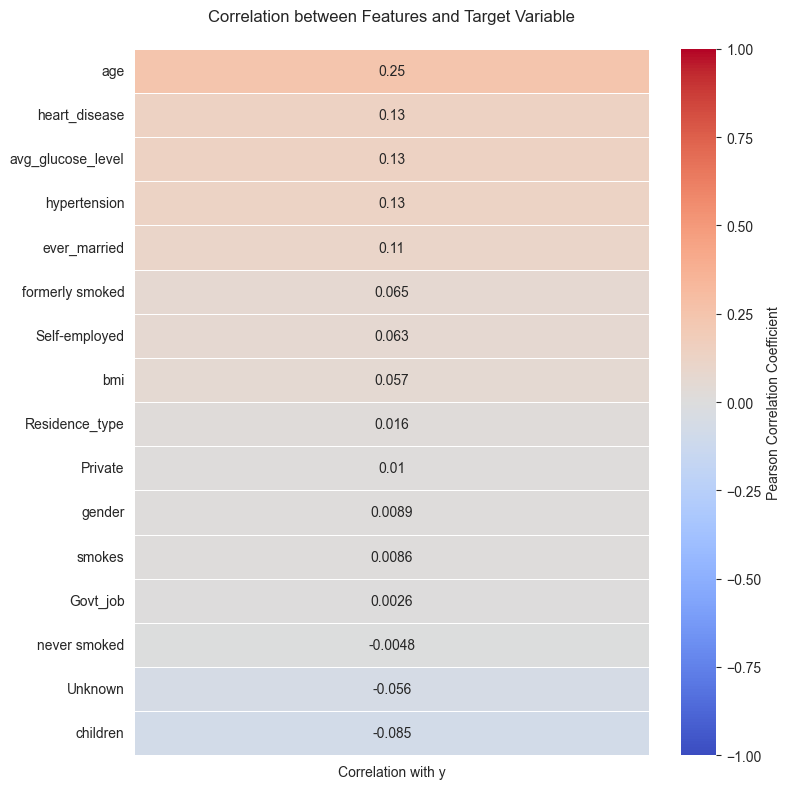

In [30]:
plt.figure(figsize=(8, len(correlations) / 2))  # Adjust figure size
heatmap = sns.heatmap(
    correlations,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Pearson Correlation Coefficient'}
)

plt.title('Correlation between Features and Target Variable', pad=20)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

---
# ML

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split to train i test set

In [68]:
X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.1, random_state=42)

In [69]:
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=0.9, random_state=42)

# Balance label to better prediction

In [70]:
x_df = pd.DataFrame(X_train)
y_df = pd.Series(y_train, name="label")

data = pd.concat([x_df, y_df], axis=1)

min_count = data['label'].value_counts().min()

balanced_data = data.groupby('label').sample(n=min_count, random_state=42)

balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

X_train_b = balanced_data.drop(columns='label')
y_train_b = balanced_data['label']

In [71]:
X_train.shape

(4482, 16)

In [72]:
X_train_b.shape

(434, 16)

# Standarize choosen columns

In [73]:
columns_to_scale = [
    'age', 'avg_glucose_level', 'bmi'
]

In [74]:
scaler = StandardScaler()

x_train_scaled = X_train.copy()
x_test_scaled = X_test.copy()

x_train_scaled[columns_to_scale] = scaler.fit_transform(x_train_scaled[columns_to_scale])
x_test_scaled[columns_to_scale] = scaler.transform(x_test_scaled[columns_to_scale])

In [75]:
scaler = StandardScaler()

x_train_scaled_b = X_train_b.copy()
x_test_scaled = X_test.copy()

x_train_scaled_b[columns_to_scale] = scaler.fit_transform(x_train_scaled_b[columns_to_scale])
x_test_scaled[columns_to_scale] = scaler.transform(x_test_scaled[columns_to_scale])

In [76]:
x_train_scaled_b.to_csv("../datasets/x_train_scaled.csv", index=False)
x_test_scaled.to_csv("../datasets/x_test_scaled.csv", index=False)
y_train_b.to_csv("../datasets/y_train.csv", index=False)
y_test.to_csv("../datasets/y_test.csv", index=False)


# save scaler

In [77]:
from joblib import dump, load

In [78]:
dump(scaler, "../scalers/scaler_selected_columns.joblib")

['../scalers/scaler_selected_columns.joblib']

# load scaler

In [79]:
scaler = load("../scalers/scaler_selected_columns.joblib")

# save data

In [80]:
x_train_scaled.to_csv("../datasets/x_train_unb.csv", index=False)
x_test_scaled.to_csv("../datasets/x_test_unb.csv", index=False)
y_train.to_csv("../datasets/y_train_unb.csv", index=False)
y_test.to_csv("../datasets/y_test_unb.csv", index=False)


In [81]:
x_train_scaled

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Private,Self-employed,Govt_job,children,formerly smoked,never smoked,smokes,Unknown
2940,1,0.552479,0,0,1,1,-0.596786,0.374140,1,0,0,0,0,0,0,1
586,1,0.949833,0,0,1,0,0.137268,-0.273475,0,0,1,0,0,1,0,0
1551,0,0.287576,0,0,1,1,-0.440922,1.286687,0,1,0,0,0,0,1,0
2763,1,-0.065628,0,0,1,0,0.047629,0.992317,1,0,0,0,0,0,1,0
2655,0,0.640780,0,0,1,0,-0.720986,1.183657,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0,0.464178,0,0,1,1,2.806128,0.197518,0,0,1,0,0,1,0,0
466,0,-0.242229,0,0,1,1,-0.775394,1.919582,0,0,1,0,0,1,0,0
3092,1,-1.345991,0,0,0,0,-0.336567,-1.715888,1,0,0,0,0,1,0,0
3772,0,-1.898755,0,0,0,0,0.291125,-1.642295,0,0,0,1,0,0,0,1


# how to use

In [82]:
from joblib import load
from sklearn.pipeline import Pipeline

In [83]:
x = pd.DataFrame({
    'gender': [1],
    'age': [45],
    'hypertension': [0],
    'heart_disease': [0],
    'ever_married': [1],
    'Residence_type': [1],
    'avg_glucose_level': [85.6],
    'bmi': [21.01],
    # only one work_type
    'Private': [1],
    'Self-employed': [0],
    'Govt_job': [0],
    'children': [0],
    # only one smoking_status
    'formerly smoked': [0],
    'never smoked': [1],
    'smokes': [0],
    'Unknown': [0]
})

model = '../models/stroke_prediction_model_pca8_gb_smote.joblib'

scaler = load("../scalers/scaler_selected_columns.joblib")
columns_to_scale = [
    'age', 'avg_glucose_level', 'bmi'
]
x[columns_to_scale] = scaler.transform(x[columns_to_scale])

train_pipeline = load(model)

infer_pipeline = Pipeline([
    ("pca",         train_pipeline.named_steps["pca"]),
    ("clf",         train_pipeline.named_steps["clf"])
])

In [84]:
stroke_prediction = infer_pipeline.predict_proba(x)
print(stroke_prediction)
print("Propability for stroke: ", np.round(stroke_prediction[0][1] * 100, 2), "%")

[[0.97787242 0.02212758]]
Propability for stroke:  2.21 %
